# Instacart

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## 1. Descripción de los datos


In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',
                              sep=';')
products = pd.read_csv('/datasets/products.csv',
                      sep=';')
order_products = pd.read_csv('/datasets/order_products.csv',
                            sep=';')
aisles = pd.read_csv('/datasets/aisles.csv',
                    sep=';')
departments = pd.read_csv('/datasets/departments.csv',
                         sep=';')

In [3]:
# mostrar información del DataFrame: Instancart Orders
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame: Products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame: Order Products
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
# mostrar información del DataFrame: Aisles
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame: Departments
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



`Hasta donde va este análisis se puede notar que los 5 DataFrames venían de origen con un separador distinto al más común ";" por lo que te tuvo que realizar un ajuste para que pandas lo pudiera leer sin ningún problema. También a simple vista se puede percatar que el DataFrame con más valores no nulos es 'order_products' con un máximo de 4.5 millones lo que nos puede indicar que cada pedido realizado contiene varios productos. Así como también 'instacart_orders' tiene cerca de 479,000 pedidos, lo que nos  podría dar una referencia de la cantidad de clientes y su comportamiento de compra. Los 3 DataFrames sobrantes ('products', 'aisles', 'departments') contienen información clave para categorizar los productos vendidos en la plataforma.`

`Todas las columnas están correctamente tipificadas, con valores numéricos para identificadores y categorizaciones, y valores de texto en nombres de productos, pasillos y departamentos.`


## 2. Preprocesamiento de los datos



`En el preprocesamiento de los datos, vamos a corregir los tipos de datos para garantizar que los ID sean enteros, manejaremos los valores ausentes con valores adecuados o eliminando registros si es necesario, y eliminaremos duplicados para evitar inconsistencias en el análisis. Analizaremos el origen de estos problemas, considerando errores de captura o integración de datos, asegurando así que el conjunto de datos sea confiable y listo para el análisis exploratorio.`

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicated_orders = instacart_orders[instacart_orders.duplicated()]
print('Número de pedidos duplicados (Inicio):',instacart_orders.duplicated().sum())
print(duplicated_orders)

Número de pedidos duplicados (Inicio): 15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

wed_insta_orders = instacart_orders[
    (instacart_orders['order_dow'] == 3) &
    (instacart_orders['order_hour_of_day'] == 2)
]

print('El número  de pedidos que se hicieron el día miércoles a las 2:00 am:', len(wed_insta_orders))

El número  de pedidos que se hicieron el día miércoles a las 2:00 am: 121


In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print('Número de pedidos duplicados (Final):',instacart_orders.duplicated().sum())

Número de pedidos duplicados (Final): 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print('Número de IDs de pedidos duplicados:',instacart_orders['order_id'].duplicated().sum())

Número de IDs de pedidos duplicados: 0



`Al detectar que había 15 de un total de 121 de pedidos duplicados, consideré correcto eliminar dichos valores; por lo que eso fue el primer ajuste que se le realizo al DataFrame 'instacart_orders'. Se verificó que el número de pedidos duplicados sea efectivamente 0, así como también que el número de IDs de pedidos sea 0 también. `

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Número de filas duplicadas:',products.duplicated().sum())

Número de filas duplicadas: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print('Número de IDs de departamentos duplicados:',products['department_id'].duplicated().sum())

Número de IDs de departamentos duplicados: 49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print('Número de nombres de productos duplicados (Inicio):',products['product_name'].str.upper().duplicated().sum())

Número de nombres de productos duplicados (Inicio): 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

# Filtrar productos con nombres no nulos
products_non_null = products.dropna(subset=['product_name'])

# Contar y mostrar los productos duplicados
print('Número de nombres de productos duplicados (sin valores faltantes):', products_non_null['product_name'].str.upper().duplicated().sum())

Número de nombres de productos duplicados (sin valores faltantes): 104


In [17]:
# Eliminar espacios en blanco y convertir a mayúsculas para estandarizar 
products['product_name'] = products['product_name'].str.strip().str.upper()

# Eliminar nombres duplicados de productos y mantener el primer registro
products = products.drop_duplicates(subset=['product_name'], keep='first').reset_index(drop=True) 

# Revisar de nuevo si hay nombres duplicados de productos 
print('Número de nombres de productos duplicados (Final):', products['product_name'].duplicated().sum() )

Número de nombres de productos duplicados (Final): 0



`Descripción breve de los hallazgos:`
`Primero se verificó que no hubiera filas completamente duplicadas. Después se reviso unicamente la columna de los IDs de departamentos y se encontró 49,673 valores duplicados, lo que nos puede decir que casi todos los productos pertenecen a departamentos que se repiten varias veces. Se detectó la existencia de 1,361 nombres de productos duplicados (sin considerar mayúsculas o minúsculas), lo que puede sugerir que existen productos con nombres idénticos en diferentes departamentos o con variaciones mínimas. Para poder hacer un análsis más robusto, se eliminaron los valores nulos (NaN) y se revisó de nuevo los valores duplicados, lo que nos redujó la cifra a 104 valores. El hallazgo anterior nos puede indicar que hay inconsistencias en la nomenclatura o productos repetidos en diferentes categorías.`

`Para poder resolver el tema con los duplicados se hizo una limpieza de dicha columna. Se eliminaron los posibles espacios en blanco antes y después del nombre; así como se convirtieron todos los nombres a mayúsculas para estandarizar la variable. Ya con este cambio, se eliminaron los nombres duplicados pero manteniendo el primer registro. Ahora ya no tenemos nombres duplicados de productos.`

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', departments.duplicated().sum())

Número de filas duplicadas: 0


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de IDs duplicados de productos:', departments['department_id'].duplicated().sum())

Número de IDs duplicados de productos: 0



`Así como para los DataFrames anteriores se verificó la existencia de filas y IDs duplicados para 'departments', pero se comprobó que no existen ni filas ni IDs duplicados, por lo que esta base está lista para el siguiente paso.`

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', aisles.duplicated().sum())

Número de filas duplicadas: 0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print('Número de filas duplicadas:', aisles['aisle_id'].duplicated().sum())

Número de filas duplicadas: 0



`Así como para los DataFrames anteriores se verificó la existencia de filas y IDs duplicados para 'aisles', pero se comprobó que no existen ni filas ni IDs duplicados, por lo que esta base está lista para el siguiente paso.`

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print('Número de filas duplicadas:', order_products.duplicated().sum())

Número de filas duplicadas: 0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Número de IDs de ordenes duplicadas:', order_products['order_id'].duplicated().sum())
print('Número de IDs de prductos duplicadas:', order_products['product_id'].duplicated().sum())

Número de IDs de ordenes duplicadas: 4094961
Número de IDs de prductos duplicadas: 4499434



`Al revisar el DataFrame de order_products, no se encontraron filas completamente duplicadas. Sin embargo, se detectaron bastante repeticiones en los campos de order_id y product_id y se puede decir que es esperado este comportamiento de los datos ya que una ordén puede contener varios productos y, a su vez, un producto puede aparecer en múltiples órdenes. Así que no se realizó ningún tratamiento de datos a este DataFrame.`

## Encuentra y elimina los valores ausentes



### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print('Número de nombres de productos ausentes(Inicio):',products['product_name'].isna().sum())
print()
print('Único nombre de producto ausente:\n', products[products['product_name'].isna()])

Número de nombres de productos ausentes(Inicio): 1

Único nombre de producto ausente:
     product_id product_name  aisle_id  department_id
37          38          NaN       100             21



`Revisando la variable de product_name en el DataFrame products noté solo la presencia de un solo nombre ausente en el id del producto 38.`

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Sí, el único nombre ausente está relacionada con el pasillo con ID de 100. 


`Como se puede observar el pasillo con ID de 100 coincide con nuestro nombre ausente, lo que puede sugerir es que dicho pasillo tenga un posible error o alguna inconsistencia en el registro de dicho pasillo.` 

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Sí, el único nombre ausente está relacionada con el departamento con ID 21. 


`De igual manera se observa que coincide el departamento con ID 21 con nuestra búsqueda. Lo que nos puede sugerir es que este departamento tiene algún problema en la entrada de datos o que faltó registrar correctamente un producto.`

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print('Nombre de pasillo con ID 100:', aisles[aisles['aisle_id']==100]['aisle'].values[0])
print()
print('Nombre del departamento con ID 21:', departments[departments['department_id']==21]['department'].values[0])

Nombre de pasillo con ID 100: missing

Nombre del departamento con ID 21: missing



`Consultando las tablas de referencia, encontré que el pasillo 100 es "missing" y el departamento 21 es "missing", lo cual sugiere que estos valores fueron reservados para productos incompletos o registros que no se pudieron categorizar adecuadamente.`

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unkown', inplace=True)
print('Número de nombres de productos ausentes(Final):',products['product_name'].isna().sum())

Número de nombres de productos ausentes(Final): 0



`Ya que conocemos el origen de porque no tenía el nombre del producto, lo reemplazamos por un string categórico de 'Unkown' y se verificó la eliminación de este.`

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print('Valores ausentes por columna (Inicio):\n',instacart_orders.isna().sum())

Valores ausentes por columna (Inicio):
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [31]:
# Verificación de los valores ausentes en los primeros pedidos
primer_pedido = instacart_orders[instacart_orders['order_number'] == 1]
print('Número de primeros pedidos:', len(primer_pedido))
print('Número de valores ausentes en esos primeros pedidos:', primer_pedido['days_since_prior_order'].isna().sum())

# Completa los valores ausentes de days_since_prior_order con 'first_order'
instacart_orders['days_since_prior_order'].fillna('first_order', inplace=True)

# Comprobación de los valores ausentes 
print()
print('Valores ausentes por columna (Final):\n',instacart_orders.isna().sum())

Número de primeros pedidos: 28817
Número de valores ausentes en esos primeros pedidos: 28817

Valores ausentes por columna (Final):
 order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64



`Al analizar los valores ausentes en el DataFrame instacart_orders, observé que la única columna con datos faltantes es days_since_prior_order, con 28,817 valores nulos. Esto tiene sentido, ya que esta columna representa los días transcurridos desde el pedido anterior, por lo que en el primer pedido de cada usuario este dato no existe. Verifiqué que todos estos valores nulos corresponden efectivamente al primer pedido (order_number == 1), por lo que decidí asignarle un valor de first_order. De esta manera ya no existen valores ausentes en el DataFrame.`

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
print('Valores ausentes por columna (Inicio):\n',order_products.isna().sum())

Valores ausentes por columna (Inicio):
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor mínimo:', order_products['add_to_cart_order'].min())
print('Valor máximo:', order_products['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0



`Como se realizó en los DataFrames anteriores, se buscaron los valores ausentes y se encontró que en la columna de add_to_cart_order hay 836 valores ausentes. Esta columna indica el orden en que los productos fueron agregados al carrito, con un rango normal de 1 a 64.`

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]
pedidos_con_id_nulos = missing_add_to_cart_order['order_id']

In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_productos_por_pedido = missing_add_to_cart_order.groupby('order_id')['product_id'].count()
print('Número mínimo de productos por pedido:', conteo_productos_por_pedido.min())

Número mínimo de productos por pedido: 1



`El análisis mostró que hay pedidos con solo 1 producto y aun así presentan valores ausentes en la columna add_to_cart_order. Esto indica que la causa del valor ausente no está relacionada con la cantidad de productos en el pedido, sino probablemente con un error de captura o ingreso de datos durante el procesamiento del pedido.`

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype(int)
print('Valores ausentes por columna (Final):\n',order_products.isna().sum())

Valores ausentes por columna (Final):
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64



`Reemplacé los valores ausentes en la columna add_to_cart_order con el valor 999 para marcar que no se conoce el orden en que se agregaron esos productos. Luego, convertí la columna al tipo entero para mantener consistencia en los datos. Verifiqué que ya no hay valores nulos en esta columna.`



`Durante este preprocesamiento de los datos se identificaron y gestionaron adecuadamente los valores nulos y duplicados en los distintos dataframes. Quiero resaltar que para cada dataframe el proceso y las soluciones fueron diferentes derivado a los diferentes origenes de dichos problemas.`

## 3. Análisis de los datos


### [A1] Verifica que los valores sean sensibles

In [37]:
print('Valores únicos de order_hour_of_day:', instacart_orders['order_hour_of_day'].sort_values().unique())

Valores únicos de order_hour_of_day: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [38]:
print('Valores únicos de order_dow:', instacart_orders['order_dow'].sort_values().unique())

Valores únicos de order_dow: [0 1 2 3 4 5 6]



`Verifiqué que las columnas order_hour_of_day y order_dow efectivamente tienen valores razonables ya que ambas están dentro de su parámetro correspondiente.`

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

La hora en que la mayor cantidad de personas hacen órdenes es las 10:00 am con un total de 40578
La hora en que la menor cantidad de personas hacen órdenes es las 03:00 am con un total de 765


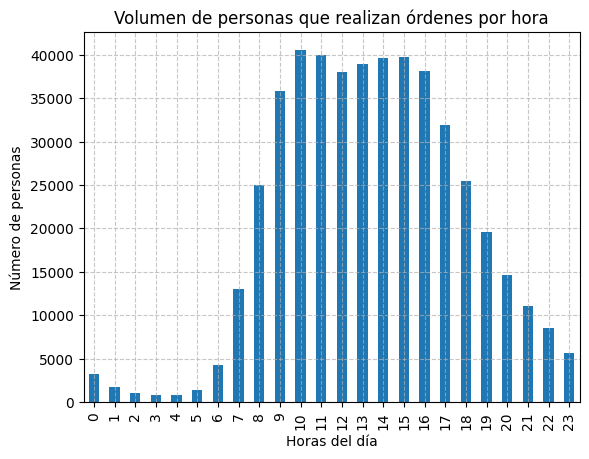

In [39]:
orders_per_hour = instacart_orders.groupby(by='order_hour_of_day')['user_id'].count()

print('La hora en que la mayor cantidad de personas hacen órdenes es las 10:00 am con un total de', orders_per_hour.max())
print('La hora en que la menor cantidad de personas hacen órdenes es las 03:00 am con un total de', orders_per_hour.min())


orders_per_hour.plot(kind='bar',
                    title='Volumen de personas que realizan órdenes por hora',
                    xlabel='Horas del día',
                    ylabel='Número de personas'
                    )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


`De acuerdo con la información que nos da este gráfico, entre las 9:00 am y 4:00 pm, es cuando se concentra la mayor cantidad de órdenes. La hora en que hay más personas haciendo órdenes es las 10:00 am con un total de 40,578 usuarios, mientras que en la que hay menos es las 03:00 am con un total de 765. `

### [A3] ¿Qué día de la semana compran víveres las personas?

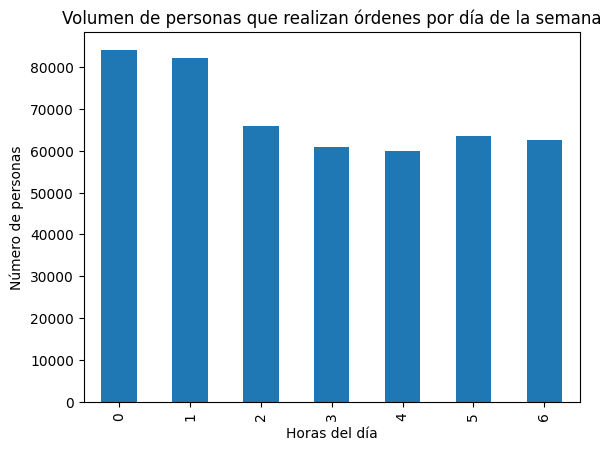

In [40]:
day_of_week_orders = instacart_orders.groupby(by='order_dow')['user_id'].count()

day_of_week_orders.plot(kind='bar',
                    title='Volumen de personas que realizan órdenes por día de la semana',
                    xlabel='Horas del día',
                    ylabel='Número de personas'
                    )
plt.show()


`Se puede percatar que todos los días de la semana tiene un gran volumen de órdenes realizadas, sin embargo, los días domingos y lunes son los favoritos de los usuarios para hacer sus pedidos.`

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Número de personas que se esperaron 0 días para realizar otro pedido: 2640
Número de personas que se esperaron 30 días para realizar otro pedido: 51337


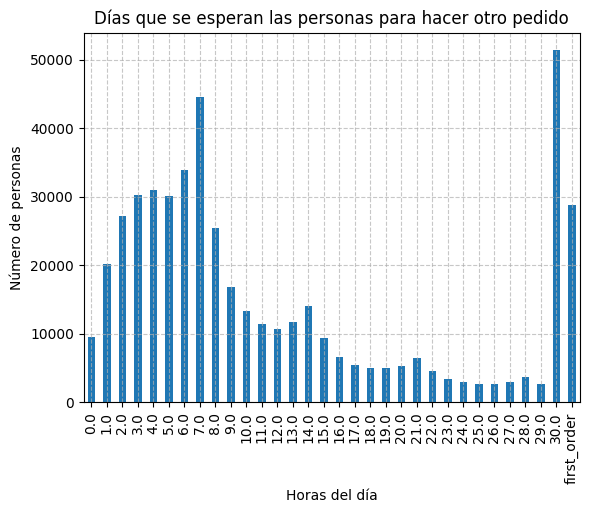

In [41]:
days_prior_order = instacart_orders.groupby(by='days_since_prior_order')['user_id'].count()

print('Número de personas que se esperaron 0 días para realizar otro pedido:', days_prior_order.min())
print('Número de personas que se esperaron 30 días para realizar otro pedido:', days_prior_order.max())


days_prior_order .plot(kind='bar',
                    title='Días que se esperan las personas para hacer otro pedido',
                    xlabel='Horas del día',
                    ylabel='Número de personas'
                    )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


`Este gráfico nos muestra la cantidad de días que se esperan los usuarios para volver a realizar un pedido en la página. Solamente 2,640 usuarios realizan otro pedido el mismo día, mientras que 51,337 usuarios se esperan 30 días. La diferencia es bastante notoria. `

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [42]:
# Filtrar para tener las ordenes en día míercoles y sábados
wendsday_orders = instacart_orders[instacart_orders['order_dow']== 3]['order_hour_of_day']
saturday_orders = instacart_orders[instacart_orders['order_dow']== 6]['order_hour_of_day']

In [43]:
# Contar las órdenes por hora del día
wendsday_orders = wendsday_orders.value_counts().sort_index()
saturday_orders  = saturday_orders.value_counts().sort_index()

In [44]:
# Crear un Dataframe con ambas series
hourly_days = pd.DataFrame({
    'miércoles':wendsday_orders,
    'sábados': saturday_orders
})

# Asegurarse de que todas las horas del 0 al 23 estén presentes (por si falta alguna)
hourly_days = hourly_days.reindex(range(24), fill_value=0)

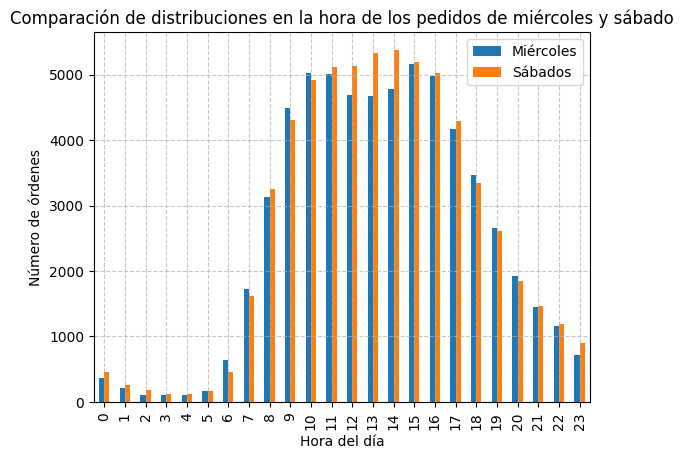

In [45]:
hourly_days.plot(kind='bar',
                title='Comparación de distribuciones en la hora de los pedidos de miércoles y sábado',
                xlabel='Hora del día',
                ylabel='Número de órdenes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(['Miércoles','Sábados'])
plt.show()


`Este gráfico nos muestra una comparación de distribuciones en la hora de los pedidos realizados entre miércoles y sábados. Dentro de las primeras 6 horas del día, los pedidos son muy bajos para ambos días, sin embargo, entre las 9:00 am y las 4:00 pm es cuando más pedidos entran a la página. `

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [46]:
orders_per_user = instacart_orders.groupby('user_id')['order_number'].max()
orders_per_user = orders_per_user.value_counts().sort_index()

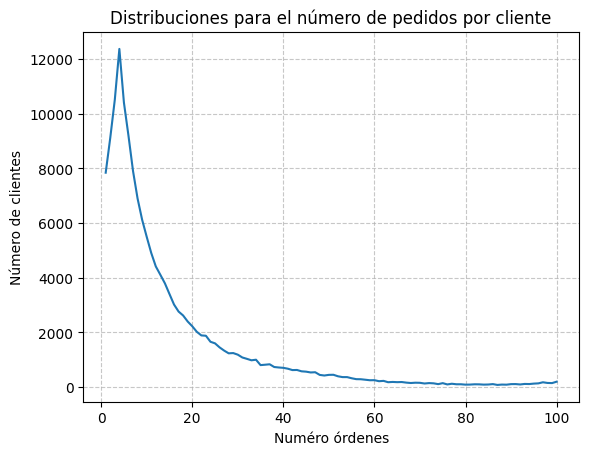

In [47]:
orders_per_user.plot(
                title='Distribuciones para el número de pedidos por cliente',
                xlabel='Numéro órdenes',
                ylabel='Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


`En el presente gráfico muestra la distribución para el número de pedidos por cliente y se puede observar que tiene un comportamiento exponencial negativo, ya que entre más número de pedidos hay menores clientes. `

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [48]:
# Agrupamos por product_id y contamos cuantas veces aparecen
product_counts = order_products.groupby('product_id').size().reset_index(name='order_count')

In [49]:
# Ordenar de mayor a menor y seleccionar los primeros 20
top_20 = product_counts.sort_values('order_count', ascending=False).head(20)

In [50]:
# Unimos con products para agregar los nombres
top_20 = top_20.merge(products, on= 'product_id')

print(top_20[['product_id', 'product_name']])

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES



`Los 20 productos más populares dentro de los usuarios son en su mayoría frutas y verduras, donde los productos órganicos al parecer son los favoritos. Esto nos podría decir que los clientes de esta empresa tienen tienen una preferencia por productos que sean más saludables y ecológicos.`

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [63]:
num_prod_per_order = order_products.groupby(by='order_id')['product_id'].count()

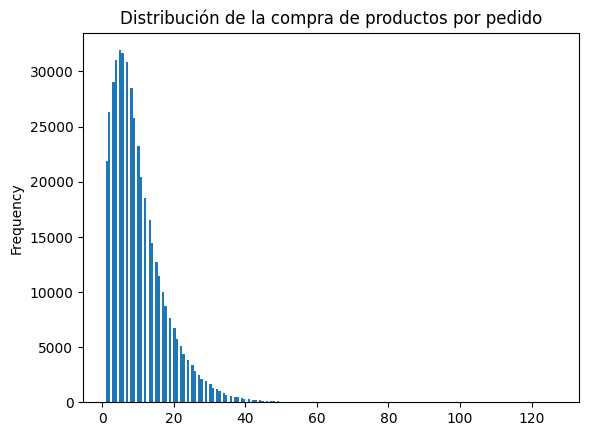

In [69]:
num_prod_per_order.plot(kind='hist',
                       bins= 200,
                       title= 'Distribución de la compra de productos por pedido')
plt.show()

In [76]:
print('El promedio de los artículos por pedido es:', num_prod_per_order.mean())
print('El máximo de los artículos por pedido es:', num_prod_per_order.max())

El promedio de los artículos por pedido es: 10.098983215049127
El máximo de los artículos por pedido es: 127



`En el gráfico anterior muestra la distribución de cuántos artículos compran normalmente las personas en un pedido, donde el promedio fue de 11 artículos y el promedio due de 127 artículos. `

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [101]:
# Filtrar solo los productos que fueron reordenados (reordered = 1)
re_product_counts = order_products[order_products['reordered']==1]

In [102]:
# Contar cuántas veces se reordenó cada producto
re_product_counts = re_product_counts['product_id'].value_counts().head(20)

In [103]:
# Convertir a DataFrame
re_product_counts = re_product_counts.reset_index()
re_product_counts.columns = ['product_id', 'reorder_count']

# Unir con el DataFrame de productos para obtener los nombres
top_reorder = re_product_counts.merge(products, on = 'product_id')

In [104]:
print(top_reorder[['product_id', 'product_name']])

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF



` La diferencia entre los productos que vuelven a pedir y los más populares es mínima. Sin embargo, los primeros 6 artículos son exactamente los mismos: banana, bag of organic bananas, organic strawberries, organic baby spinach,organic hass avocado, organic avocado. `

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [119]:
#  Contar cuántas veces se pidió cada producto
total_orders = order_products.groupby(by='product_id').size()

# Contar cuántas veces fue reordenado cada producto 
reorders = order_products[order_products['reordered']==1].groupby(by='product_id').size()

In [120]:
# Juntar ambos DataFrames
reorder_rate = pd.DataFrame({
    'total_orders': total_orders,
    'reorders': reorders
})

In [121]:
# Llena de 0 los productos que no se volvieron a pedir
reorder_rate.fillna(0, inplace=True)

In [134]:
# Calcular la tasa de repetición 
reorder_rate['reoder_ratio'] = reorder_rate['reorders'] / reorder_rate['total_orders']

print('La tasa de repetión promedio para cada producto es de:',reorder_rate['reoder_ratio'].mean())

La tasa de repetión promedio para cada producto es de: 0.38670677893645



` La tasa de repetición promedio para para productos nos dice que, en promedio, alrededor del 38.7% de las veces que un producto es comprado, ya había sido comprado antes por ese mismo cliente. Así como también, hay una tendencia moderada a repetir productos, pero también muchos clientes prueban productos nuevos con frecuencia.`

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [131]:
# Unir el DataFrame de order_products con el de instacart_orders para poder obtener un ID de un usuario con sus pedidos
orders_w_users = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')

In [130]:
# Contar productos totales y reordenados por usuarios
user_order_stats = orders_w_users.groupby(by='user_id').agg(
    total_products= ('product_id','count'),
    reordered_products = ('reordered', 'sum')
)

In [135]:
# Calcular la tasa de repetición 
user_order_stats['repeat_rate'] = user_order_stats['reordered_products'] / user_order_stats['total_products']

print('La tasa de repetión promedio para cada cliente es de:', user_order_stats['repeat_rate'].mean())

La tasa de repetión promedio para cada cliente es de: 0.4948531736151642



`La tasa de repetición promedio por cliente nos dice que en promedio, cada cliente vuelve a pedir casi la mitad de los productos que ya había comprado antes. `

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [137]:
# Filtrar el DataFrame de order_products por artículos que fueron primeros en los carritos de compra
first_order = order_products[order_products['add_to_cart_order']==1]

In [138]:
# Contar cuántas veces se reordenó cada producto
first_order = first_order['product_id'].value_counts().head(20)

In [139]:
# Convertir a DataFrame
first_order = first_order.reset_index()
first_order.columns = ['product_id', 'firts_order_count']

# Unir con el DataFrame de productos para obtener los nombres
top_first = first_order.merge(products, on = 'product_id')

In [140]:
print(top_first[['product_id', 'product_name','firts_order_count']])

    product_id                 product_name  firts_order_count
0        24852                       BANANA              15562
1        13176       BAG OF ORGANIC BANANAS              11026
2        27845           ORGANIC WHOLE MILK               4363
3        21137         ORGANIC STRAWBERRIES               3946
4        47209         ORGANIC HASS AVOCADO               3390
5        21903         ORGANIC BABY SPINACH               3336
6        47766              ORGANIC AVOCADO               3044
7        19660                 SPRING WATER               2336
8        16797                 STRAWBERRIES               2308
9        27966          ORGANIC RASPBERRIES               2024
10       44632   SPARKLING WATER GRAPEFRUIT               1914
11       49235          ORGANIC HALF & HALF               1797
12       47626                  LARGE LEMON               1737
13         196                         SODA               1733
14       38689     ORGANIC REDUCED FAT MILK            


`Sorpresivamente se a repetieron varios datos con los otros DataFrames, pero específicamente los primeros 2 productos : banana y bag of organic bananas. `

### Conclusión 

`En el análisis de los datos de Instacart, se identificaron los productos más comprados, como plátanos y aguacates orgánicos, que muestran altas tasas de repetición. Los clientes tienden a reordenar alrededor del 49.5% de los productos que compran, lo que refleja un comportamiento leal y repetitivo. A nivel de producto, la tasa de repetición es de 38.7%, destacando productos como frutas y lácteos orgánicos como los más recurrentes. Este comportamiento sugiere que los consumidores prefieren ciertos artículos, especialmente aquellos con opciones orgánicas. Los datos muestran que los productos frescos, como frutas y verduras, tienen una mayor probabilidad de ser reordenados. Este hallazgo es valioso para la optimización de inventarios y estrategias de marketing, ya que puede orientarse hacia productos de alta repetición. Además, se podría implementar promociones específicas para fomentar la lealtad del cliente. En general, las tendencias de compra repetida en Instacart indican un fuerte potencial para fomentar la fidelidad a través de promociones y descuentos dirigidos. Estos análisis proporcionan una visión clara sobre cómo maximizar las ventas basadas en el comportamiento del cliente.`